# sample1

We run [RCTD](https://www.nature.com/articles/s41587-021-00830-w) on the sample.

Here are the libraries we need.

In [1]:
library(Seurat)
library(dplyr)
library(future)
library(ggplot2)
library(plotly)
library(readr)
library(spacexr)
library(tibble)

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




We create the output directory for this noteboook.
Every outputs will save there.

In [2]:
dir.create("output", showWarnings=F)

## Create a reference object

We load the digital expression matrix and the cell types for the reference.

In [3]:
ref_counts <- Seurat::Read10X("reference", gene.column=2)

cell_types <-
   readr::read_tsv(file.path("reference", "types.tsv.gz"), col_names=F) %>%
   dplyr::pull(X1) %>%
   setNames(colnames(ref_counts)) %>%
   as.factor()

ref_nUMIs <- colSums(ref_counts)

Rows: 113507 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


We create a RCTD reference object.

In [4]:
ref <- spacexr::Reference(round(ref_counts), cell_types, ref_nUMIs)
saveRDS(ref, "output/reference.rds")

Warning message in spacexr::Reference(round(ref_counts), cell_types, ref_nUMIs):
“Reference: number of cells per cell type is 27882, larger than maximum allowable of 10000. Downsampling number of cells to: 10000”


## Create a sample object

We load the digital expression matrix and the spatial information of the sample.

In [5]:
counts <- Seurat::Read10X("sample1", gene.column=2)

nUMIs <- colSums(counts)

spatial <-
    readr::read_csv("sample1.csv") %>%
    tibble::column_to_rownames("Barcode")

spatial <- spatial[colnames(counts),]

spots <- spacexr::SpatialRNA(spatial, counts, nUMIs)

Rows: 58092 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Barcode
dbl (2): x, y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


We create a RCTD object.

In [6]:
plan("multicore", workers=12)
rctd <- spacexr::create.RCTD(spots, ref, max_cores=12)

Begin: process_cell_type_info

process_cell_type_info: number of cells in reference: 74862

process_cell_type_info: number of genes in reference: 20310




            Astrocyte                   CA1                   CA3 
                10000                 10000                 10000 
        Cajal_Retzius               Choroid                Denate 
                  672                    44                 10000 
    Endothelial_Stalk       Endothelial_Tip           Entorihinal 
                 4233                   676                  4565 
            Ependymal           Interneuron Microglia_Macrophages 
                  715                  6424                  1307 
                Mural          Neurogenesis        Neuron.Slc17a6 
                 1569                   988                  6337 
      Oligodendrocyte        Polydendrocyte 
                 5050                  2282 


End: process_cell_type_info

create.RCTD: getting regression differentially expressed genes: 

get_de_genes: Astrocyte found DE genes: 256

get_de_genes: CA1 found DE genes: 305

get_de_genes: CA3 found DE genes: 381

get_de_genes: Cajal_Retzius found DE genes: 226

get_de_genes: Choroid found DE genes: 218

get_de_genes: Denate found DE genes: 248

get_de_genes: Endothelial_Stalk found DE genes: 376

get_de_genes: Endothelial_Tip found DE genes: 222

get_de_genes: Entorihinal found DE genes: 267

get_de_genes: Ependymal found DE genes: 336

get_de_genes: Interneuron found DE genes: 282

get_de_genes: Microglia_Macrophages found DE genes: 280

get_de_genes: Mural found DE genes: 295

get_de_genes: Neurogenesis found DE genes: 291

get_de_genes: Neuron.Slc17a6 found DE genes: 243

get_de_genes: Oligodendrocyte found DE genes: 278

get_de_genes: Polydendrocyte found DE genes: 223

get_de_genes: total DE genes: 2858

create.RCTD: getting platform effect normalization differentially expres

## Run RCTD

In [7]:
rctd <- spacexr::run.RCTD(rctd, doublet_mode="doublet")

saveRDS(rctd, "output/rctd.rds")

readr::write_csv(
   rctd@results$results_df %>% tibble::rownames_to_column("cell"),
   "output/rctd.csv"
)

fitBulk: decomposing bulk

chooseSigma: using initial Q_mat with sigma =  1

Likelihood value: 493717.292765611

Sigma value:  0.88

Likelihood value: 493306.451579599

Sigma value:  0.88



[1] "gather_results: finished 1000"
[1] "gather_results: finished 2000"
[1] "gather_results: finished 3000"
[1] "gather_results: finished 4000"
[1] "gather_results: finished 5000"
[1] "gather_results: finished 6000"
[1] "gather_results: finished 7000"
[1] "gather_results: finished 8000"
[1] "gather_results: finished 9000"


## Results

### First type

Joining, by = "cell"
No trace type specified:
  Based on info supplied, a 'scatter' trace seems appropriate.
  Read more about this trace type -> https://plotly.com/r/reference/#scatter

No scatter mode specifed:
  Setting the mode to markers
  Read more about this attribute -> https://plotly.com/r/reference/#scatter-mode

Warning message in RColorBrewer::brewer.pal(N, "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(N, "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
No trace type specified:
  Based on info supplied, a 'scatter' trace seems appropriate.
  Read more about this trace type -> https://plotly.com/r/reference/#scatter

No scatter mode specifed:
  Setting the mode to markers
  Read more about this attribute -> https://plotly.com/r/reference/#scatter-mode

Warning message in RColorBrewer::br

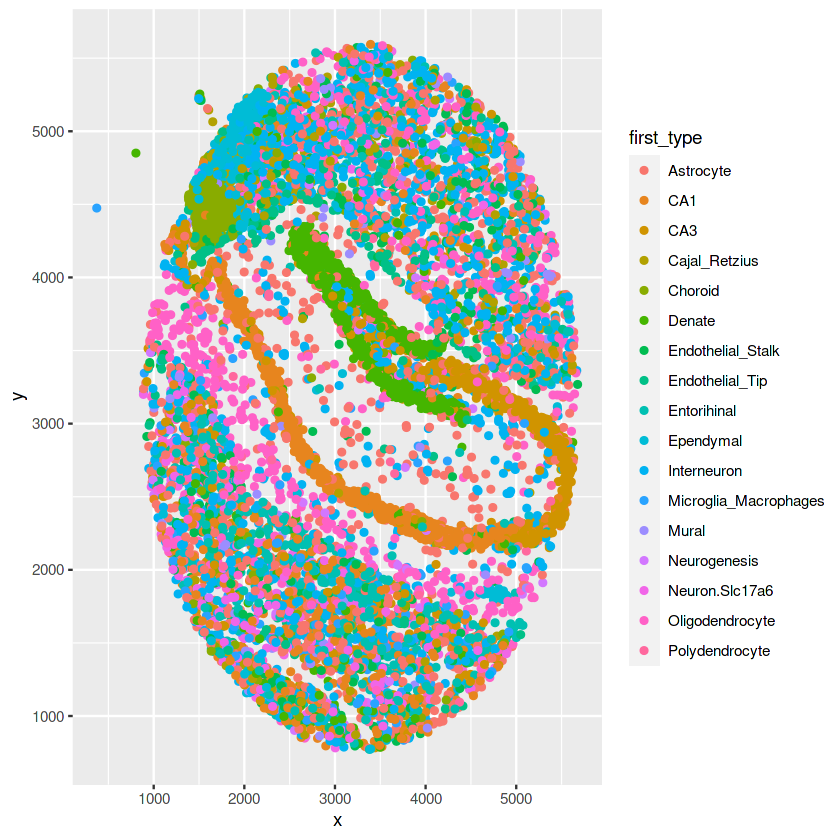

In [8]:
if ( "first_type" %in% colnames(rctd@results$results_df) )
{
   df <-
      rctd@results$results_df %>%
      tibble::rownames_to_column("cell") %>%
      dplyr::inner_join( spatial %>% tibble::rownames_to_column("cell") )
   
   fig <- plotly::plot_ly(data=df, x=~x, y=~y, color=~first_type)
   
   plotly::save_image(fig, "output/first_type.png")
   plotly::save_image(fig, "output/first_type.pdf")
   
   #fig

   g <- ggplot2::ggplot(df, aes(x=x, y=y, color=first_type)) + geom_point()
   g
}

### Second type

Joining, by = "cell"
No trace type specified:
  Based on info supplied, a 'scatter' trace seems appropriate.
  Read more about this trace type -> https://plotly.com/r/reference/#scatter

No scatter mode specifed:
  Setting the mode to markers
  Read more about this attribute -> https://plotly.com/r/reference/#scatter-mode

Warning message in RColorBrewer::brewer.pal(N, "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(N, "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
No trace type specified:
  Based on info supplied, a 'scatter' trace seems appropriate.
  Read more about this trace type -> https://plotly.com/r/reference/#scatter

No scatter mode specifed:
  Setting the mode to markers
  Read more about this attribute -> https://plotly.com/r/reference/#scatter-mode

Warning message in RColorBrewer::br

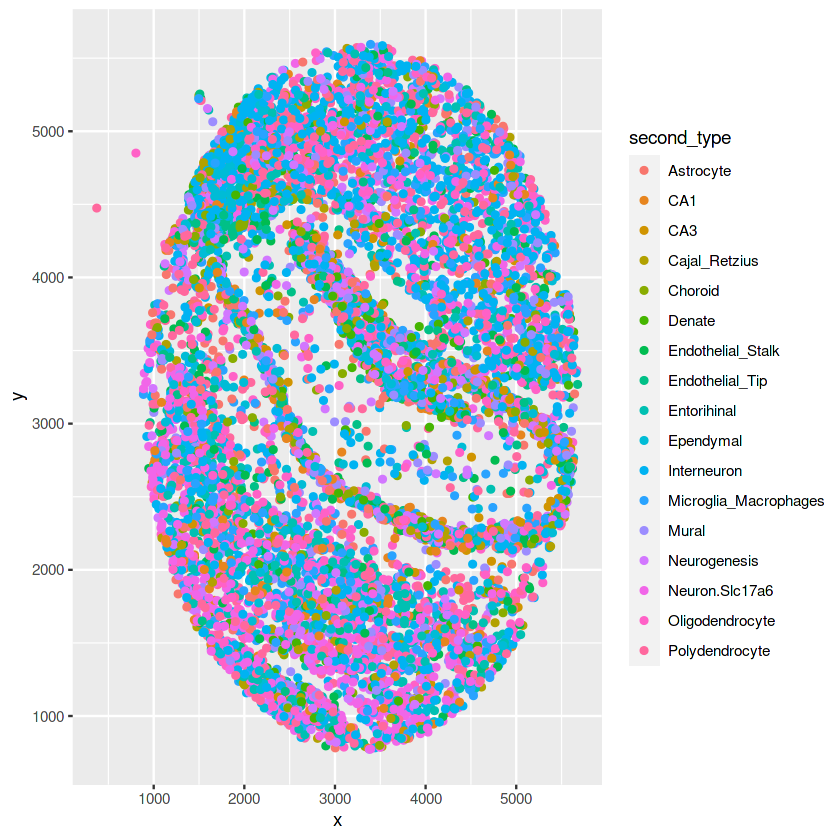

In [9]:
if ( "second_type" %in% colnames(rctd@results$results_df) )
{
   df <-
      rctd@results$results_df %>%
      tibble::rownames_to_column("cell") %>%
      dplyr::inner_join( spatial %>% tibble::rownames_to_column("cell") )
   
   fig <- plotly::plot_ly(data=df, x=~x, y=~y, color=~second_type)
   
   plotly::save_image(fig, "output/second_type.png")
   plotly::save_image(fig, "output/second_type.pdf")
   
   #fig

   g <- ggplot2::ggplot(df, aes(x=x, y=y, color=second_type)) + geom_point()
   g
}

## Session info

In [10]:
sessionInfo()

R version 4.2.1 (2022-06-23)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu Kinetic Kudu (development branch)

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.20.so

locale:
 [1] LC_CTYPE=C.UTF-8    LC_NUMERIC=C        LC_TIME=C          
 [4] LC_COLLATE=C        LC_MONETARY=C       LC_MESSAGES=C      
 [7] LC_PAPER=C          LC_NAME=C           LC_ADDRESS=C       
[10] LC_TELEPHONE=C      LC_MEASUREMENT=C    LC_IDENTIFICATION=C

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] tibble_3.1.7       spacexr_2.0.0      readr_2.1.2        plotly_4.10.0     
[5] ggplot2_3.3.6      future_1.26.1      dplyr_1.0.9        SeuratObject_4.0.4
[9] Seurat_4.1.0      

loaded via a namespace (and not attached):
  [1] Rtsne_0.16            colorspace_2.0-3      deldir_1.0-6         
  [4] ellipsis_0.3